## Understand the problem statement and business case

### Facts

1. Marketing is crucial for the growth and sustainability of any business.
2. Marketers can help build the company’s brand, engage customers, grow revenue, and increase sales.
3. One of the key pain points for marketers is to know their customers and identify their needs.
4. By understanding the customer, marketers can launch a targeted marketing campaign that is tailored for specific needs.
5. If data about the customers is available, data science can be applied to perform market segmentation.
6. It takes 52 days on average to fill a position

### Goal
**Launch a targeted ad marketing campaing by dividing their customers into at least 3 distinctive groups.*

## Import libraries and dataset

#### Data Dictionary for Dataset
- PURCHASES_FREQUENCY: how frequently the purchases are being made
    - score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFF_PURCHASES_FREQUENCY: how frequently Purchases are happening in one-go 
    - score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASES_INSTALLMENTS_FREQUENCY: how frequently purchases in installments are being done 
    - score between 0 and 1 (1 = frequently done, 0 = not frequently done)
- CASH_ADVANCE_FREQUENCY: how frequently the cash in advance being paid
- CASH_ADVANCE_TRX: number of Transactions made with "Cash in Advance"
- PURCHASES_TRX: number of purchase transactions made
- CREDIT_LIMIT: limit of Credit Card for user
- PAYMENTS: amount of Payment done by user
- MINIMUM_PAYMENTS: minimum amount of payments made by user  
- PRC_FULL_PAYMENT: percent of full payment paid by user
- TENURE: tenure of credit card service for user

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
#Principal Component Analysis
from sklearn.decomposition import PCA 

In [2]:
df = pd.read_csv(r'Marketing_data.csv')
df.shape

(8950, 18)

In [3]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
df[df['PURCHASES'] == 49039.570000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [7]:
df['CASH_ADVANCE'].max()

47137.21176

In [8]:
df[df['CASH_ADVANCE'] == 47137.21176]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


array([[<AxesSubplot:title={'center':'BALANCE'}>,
        <AxesSubplot:title={'center':'BALANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES'}>],
       [<AxesSubplot:title={'center':'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE'}>,
        <AxesSubplot:title={'center':'PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<AxesSubplot:title={'center':'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_TRX'}>,
        <AxesSubplot:title={'center':'PURCHASES_TRX'}>],
       [<AxesSubplot:title={'center':'CREDIT_LIMIT'}>,
        <AxesSubplot:title={'center':'PAYMENTS'}>,
        <AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}>,
        <AxesSubplot:title={'center':'PRC_FULL_PAYMENT'}>],
       [<AxesSubplot:title={'center':'TENURE'

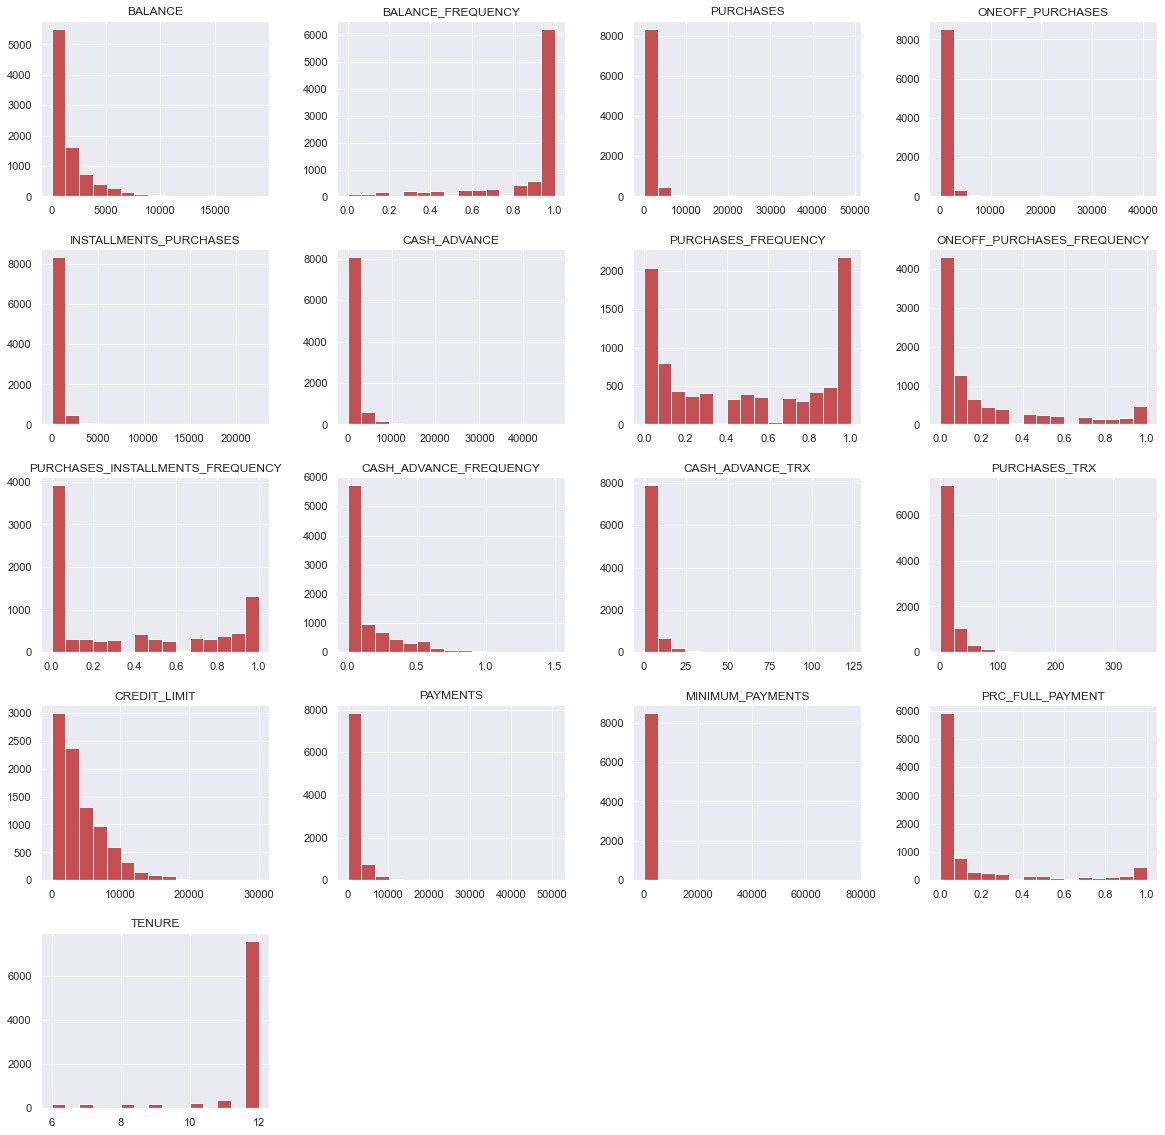

In [9]:
df.hist(bins = 15, figsize = (20, 20), color = 'r')

In [10]:
#top 10 customers in PURCHASES
top10_purchases = df.nlargest(10, 'PURCHASES')
top10_purchases

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.520010,1.000000,49039.57,40761.25,8278.32,558.166886,1.000000,1.000000,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.250000,12
501,C10523,13479.288210,1.000000,41050.40,40624.06,426.34,0.000000,0.833333,0.666667,0.416667,0.000000,0,157,17000.0,36066.75068,15914.484620,0.083333,12
1256,C11300,4010.621974,1.000000,40040.71,24543.52,15497.19,0.000000,1.000000,1.000000,1.000000,0.000000,0,358,18000.0,33994.72785,703.503256,1.000000,12
1604,C11657,3391.702180,1.000000,38902.71,33803.84,5098.87,0.000000,1.000000,1.000000,1.000000,0.000000,0,195,18000.0,35843.62593,716.027656,1.000000,12
3937,C14048,2997.977825,1.000000,35131.16,34087.73,1043.43,0.000000,1.000000,1.000000,0.833333,0.000000,0,344,12000.0,28896.66522,767.014180,0.750000,12
273,C10284,5131.319584,1.000000,32539.78,26547.43,5992.35,0.000000,1.000000,1.000000,1.000000,0.000000,0,98,11500.0,26652.34432,1971.129435,0.083333,12
1641,C11695,3454.094319,1.000000,31299.35,19064.30,12235.05,0.000000,1.000000,0.666667,0.833333,0.000000,0,121,7500.0,22542.58705,1193.031030,0.583333,12
587,C10611,2492.726282,1.000000,27957.68,23032.97,4924.71,0.000000,1.000000,1.000000,0.916667,0.000000,0,70,9000.0,27255.00752,537.372671,1.000000,12
3698,C13802,3012.178613,1.000000,27790.42,14605.99,13184.43,469.074937,1.000000,0.666667,1.000000,0.083333,1,79,12000.0,27839.82354,569.401398,0.727273,12
7046,C17237,2980.054695,0.818182,26784.62,26514.32,270.30,0.000000,0.583333,0.500000,0.083333,0.000000,0,33,30000.0,30029.01496,11853.796130,0.750000,12


In [11]:
top10_purchases.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0
mean,5249.748369,0.981818,35053.640000,28358.541000,6695.099000,102.724182,0.941667,0.850000,0.800000,0.016667,0.200000,155.600000,15750.000000,31605.114531,3719.982980,0.622727,12.0
std,3922.064245,0.057496,7173.697909,8767.731084,5492.203495,217.577315,0.136366,0.199536,0.307318,0.035136,0.421637,112.416092,6832.316998,6896.310210,5495.081068,0.364036,0.0
min,2492.726282,0.818182,26784.620000,14605.990000,270.300000,0.000000,0.583333,0.500000,0.083333,0.000000,0.000000,33.000000,7500.000000,22542.587050,537.372671,0.083333,12.0
25%,3001.528022,1.000000,28793.097500,23410.607500,2013.750000,0.000000,1.000000,0.666667,0.833333,0.000000,0.000000,83.750000,11625.000000,27401.211525,706.634356,0.333333,12.0
50%,3422.898250,1.000000,33835.470000,26530.875000,5545.610000,0.000000,1.000000,1.000000,0.916667,0.000000,0.000000,111.000000,14500.000000,29462.840090,980.022605,0.738636,12.0
75%,4851.145182,1.000000,39756.210000,34016.757500,11245.867500,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,185.500000,18000.000000,35381.401410,2723.334425,0.937500,12.0
max,13479.288210,1.000000,49039.570000,40761.250000,15497.190000,558.166886,1.000000,1.000000,1.000000,0.083333,1.000000,358.000000,30000.000000,46930.598240,15914.484620,1.000000,12.0


In [12]:
#top 10 customers in ONEOFF_PURCHASES
df.nlargest(10, 'ONEOFF_PURCHASES')

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.520010,1.000000,49039.57,40761.25,8278.32,558.166886,1.000000,1.000000,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.250000,12
501,C10523,13479.288210,1.000000,41050.40,40624.06,426.34,0.000000,0.833333,0.666667,0.416667,0.000000,0,157,17000.0,36066.75068,15914.484620,0.083333,12
3937,C14048,2997.977825,1.000000,35131.16,34087.73,1043.43,0.000000,1.000000,1.000000,0.833333,0.000000,0,344,12000.0,28896.66522,767.014180,0.750000,12
1604,C11657,3391.702180,1.000000,38902.71,33803.84,5098.87,0.000000,1.000000,1.000000,1.000000,0.000000,0,195,18000.0,35843.62593,716.027656,1.000000,12
273,C10284,5131.319584,1.000000,32539.78,26547.43,5992.35,0.000000,1.000000,1.000000,1.000000,0.000000,0,98,11500.0,26652.34432,1971.129435,0.083333,12
7046,C17237,2980.054695,0.818182,26784.62,26514.32,270.30,0.000000,0.583333,0.500000,0.083333,0.000000,0,33,30000.0,30029.01496,11853.796130,0.750000,12
1447,C11495,8151.985277,1.000000,25615.07,25122.77,492.30,0.000000,1.000000,1.000000,0.583333,0.000000,0,56,17000.0,17575.20083,2465.465414,0.166667,12
1256,C11300,4010.621974,1.000000,40040.71,24543.52,15497.19,0.000000,1.000000,1.000000,1.000000,0.000000,0,358,18000.0,33994.72785,703.503256,1.000000,12
587,C10611,2492.726282,1.000000,27957.68,23032.97,4924.71,0.000000,1.000000,1.000000,0.916667,0.000000,0,70,9000.0,27255.00752,537.372671,1.000000,12
507,C10529,2643.343414,1.000000,26402.39,22257.39,4145.00,0.000000,1.000000,1.000000,0.333333,0.000000,0,114,16500.0,24529.27662,534.032339,1.000000,12


In [13]:
#top 10 customers in INSTALLMENTS_PURCHASES
df.nlargest(10, 'INSTALLMENTS_PURCHASES')

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5260,C15407,4060.710208,0.727273,22500.00,0.00,22500.00,0.000000,0.500000,0.000000,0.416667,0.000000,0,12,23000.0,8760.860264,1645.535202,0.000000,12
1256,C11300,4010.621974,1.000000,40040.71,24543.52,15497.19,0.000000,1.000000,1.000000,1.000000,0.000000,0,358,18000.0,33994.727850,703.503256,1.000000,12
3181,C13272,11631.323370,1.000000,14686.10,0.00,14686.10,3422.724703,1.000000,0.000000,1.000000,0.083333,2,347,13600.0,11400.601300,10285.134120,0.000000,12
3698,C13802,3012.178613,1.000000,27790.42,14605.99,13184.43,469.074937,1.000000,0.666667,1.000000,0.083333,1,79,12000.0,27839.823540,569.401398,0.727273,12
2823,C12905,11642.601560,1.000000,15108.47,2370.00,12738.47,0.000000,1.000000,0.500000,1.000000,0.000000,0,298,12000.0,16005.452040,11652.565110,0.000000,12
138,C10144,19043.138560,1.000000,22009.92,9449.07,12560.85,0.000000,1.000000,0.750000,1.000000,0.000000,0,216,18000.0,23018.575830,18621.013310,0.000000,12
1709,C11765,1917.441126,0.909091,12617.19,76.19,12541.00,0.000000,0.333333,0.166667,0.166667,0.000000,0,5,15000.0,13733.557830,336.823302,0.428571,12
1433,C11481,1367.479599,0.818182,12375.00,0.00,12375.00,0.000000,0.750000,0.000000,0.750000,0.000000,0,9,16500.0,15246.115940,295.779348,1.000000,12
1641,C11695,3454.094319,1.000000,31299.35,19064.30,12235.05,0.000000,1.000000,0.666667,0.833333,0.000000,0,121,7500.0,22542.587050,1193.031030,0.583333,12
645,C10671,1482.235539,1.000000,14604.87,2475.93,12128.94,0.000000,1.000000,0.583333,1.000000,0.000000,0,219,15500.0,14462.630560,340.717801,1.000000,12


In [14]:
#top 10 customers in CASH_ADVANCE
df.nlargest(10, 'CASH_ADVANCE')

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.053810,1.000000,431.93,133.50,298.43,47137.21176,0.583333,0.250000,0.500000,1.000000,123,21,19600.0,39048.59762,5394.173671,0.000000,12
1059,C11094,8823.284205,1.000000,3719.00,2293.18,1425.82,29282.10915,1.000000,0.750000,1.000000,0.416667,26,61,15500.0,28150.97869,7321.639932,0.083333,12
71,C10074,2990.422186,0.909091,4523.27,1664.09,2859.18,27296.48576,0.666667,0.500000,0.583333,0.833333,27,33,7000.0,28232.69446,1107.030803,0.454545,12
7254,C17450,4530.205197,1.000000,1750.66,643.18,1107.48,26268.69989,1.000000,0.333333,1.000000,0.583333,10,36,8500.0,25203.91336,1366.869273,0.250000,12
7645,C17851,7081.171387,1.000000,0.00,0.00,0.00,26194.04954,0.000000,0.000000,0.000000,0.909091,69,0,9000.0,20191.30770,1926.017588,0.222222,11
2454,C12528,10915.550750,1.000000,0.00,0.00,0.00,23130.82106,0.000000,0.000000,0.000000,0.583333,23,0,15000.0,18341.95467,3127.192305,0.000000,12
883,C10914,14581.459140,1.000000,0.00,0.00,0.00,22665.77850,0.000000,0.000000,0.000000,0.833333,30,0,18500.0,20941.32551,5433.759888,0.000000,12
6371,C16546,4529.895962,0.727273,0.00,0.00,0.00,21943.84942,0.000000,0.000000,0.000000,0.333333,12,0,13000.0,33486.31044,1797.797941,0.428571,12
3806,C13914,14100.251100,1.000000,4995.80,3403.11,1592.69,20712.67008,1.000000,1.000000,0.333333,0.833333,36,34,16500.0,20418.33238,21235.065300,0.000000,12
6455,C16632,9110.968989,1.000000,1490.75,1490.75,0.00,20277.33112,0.166667,0.166667,0.000000,0.333333,22,5,11000.0,19740.74802,2684.226743,0.000000,12


In [15]:
def top10_append(df,cust_id,coln,impcol):
    arr = pd.DataFrame()
    for col in coln:
        top_df = df.nlargest(10, col)
        top_df['CUST_TYPE'] = col
        top_df.set_index(cust_id, inplace=True)
        top_df = top_df[[impcol, col, 'CUST_TYPE']]
        arr = arr.append(top_df)
    return arr[['CUST_TYPE', impcol, coln[0], coln[1], coln[2], coln[3]]].sort_index(ascending=True)

In [16]:
top10 = top10_append(df, 'CUST_ID', ['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE'], 'BALANCE')
top10

,CUST_TYPE,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE
CUST_ID,,,,,,
C10074,CASH_ADVANCE,2990.422186,NaN,NaN,NaN,27296.48576
C10144,INSTALLMENTS_PURCHASES,19043.138560,NaN,NaN,12560.85,NaN
C10284,ONEOFF_PURCHASES,5131.319584,NaN,26547.43,NaN,NaN
C10284,PURCHASES,5131.319584,32539.78,NaN,NaN,NaN
C10523,PURCHASES,13479.288210,41050.40,NaN,NaN,NaN
C10523,ONEOFF_PURCHASES,13479.288210,NaN,40624.06,NaN,NaN
C10529,ONEOFF_PURCHASES,2643.343414,NaN,22257.39,NaN,NaN
C10574,ONEOFF_PURCHASES,11547.520010,NaN,40761.25,NaN,NaN
C10574,PURCHASES,11547.520010,49039.57,NaN,NaN,NaN


## Visualize and Explore dataset (EDA)

<AxesSubplot:>

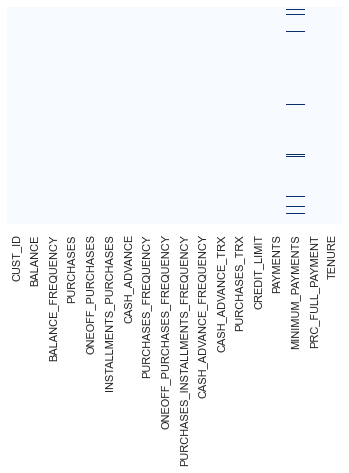

In [17]:
#check if there's missing data
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [18]:
#check how many missed elements has the df. 
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [19]:
#fill the nulls with the average value
df.loc[(df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()
df.loc[(df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()

In [20]:
#validate previous transformation
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [21]:
#check if there's dups
df.duplicated().sum()

0

In [22]:
#drop columns which do add any value
df.drop('CUST_ID', axis=1, inplace=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [23]:
#check number of columns
ncols = len(df.columns)
ncols

17

In [24]:
#check columns name
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [25]:
import warnings 
warnings.simplefilter('ignore')

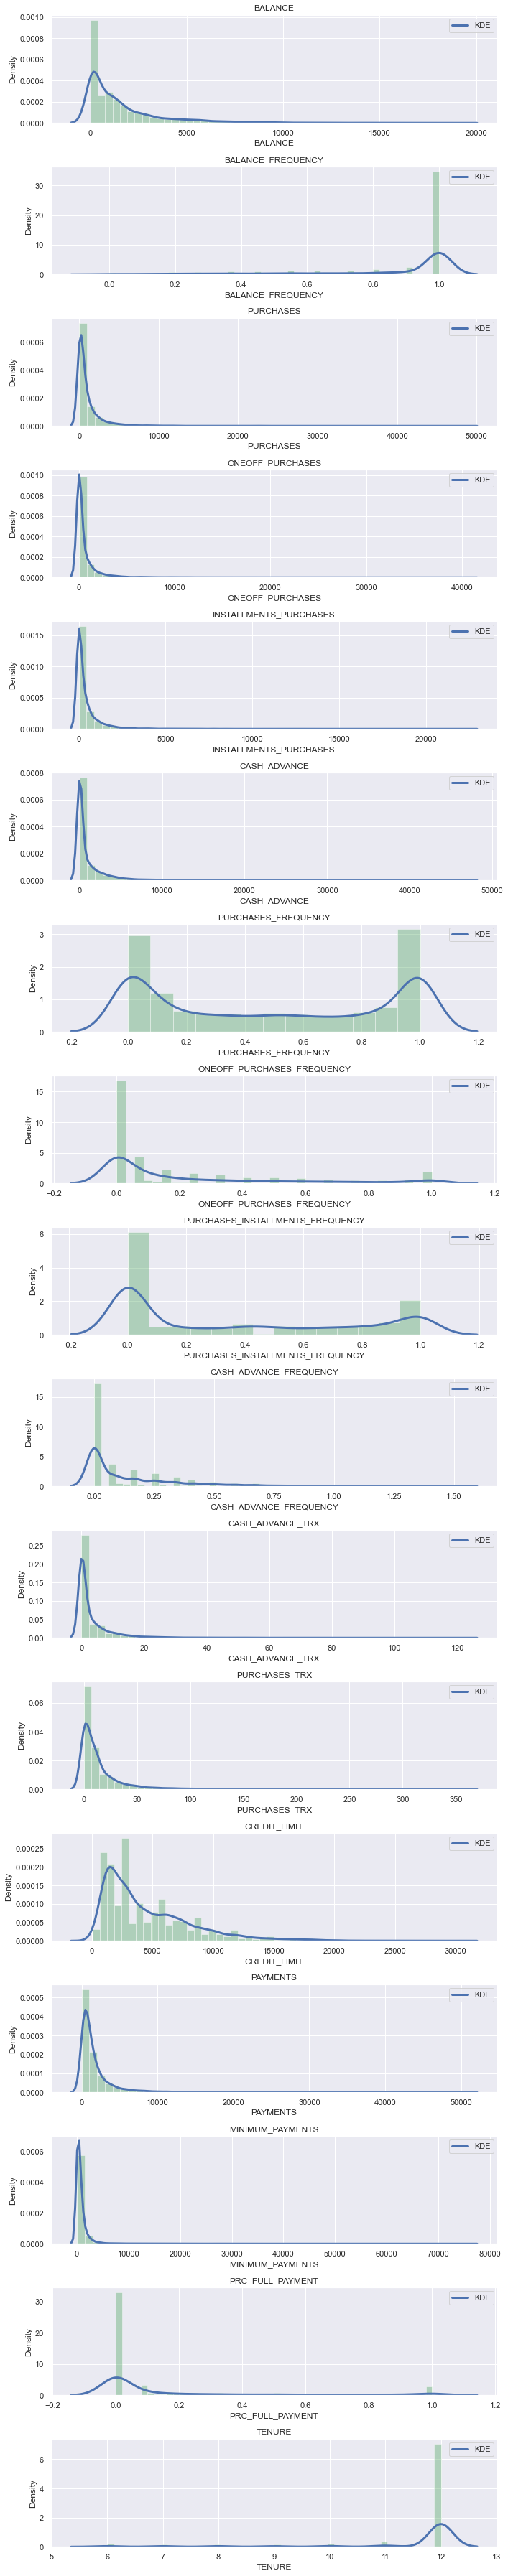

In [26]:
#KDE Kernel Density Estimation
plt.figure(figsize = (10,50))
for i in range(len(df.columns)):
    plt.subplot(17, 1, i+1)
    #deprecated function.
    sns.distplot(df[df.columns[i]], kde_kws = {'color':'b', 'lw':3, 'label':'KDE'}, hist_kws={'color':'g'})
    #sns.histplot(df[df.columns[i]], kde=True, kde_kws={'cut':3})
    plt.title(df.columns[i])
    plt.legend()

plt.tight_layout()

In [27]:
correlations = df.corr()

<AxesSubplot:>

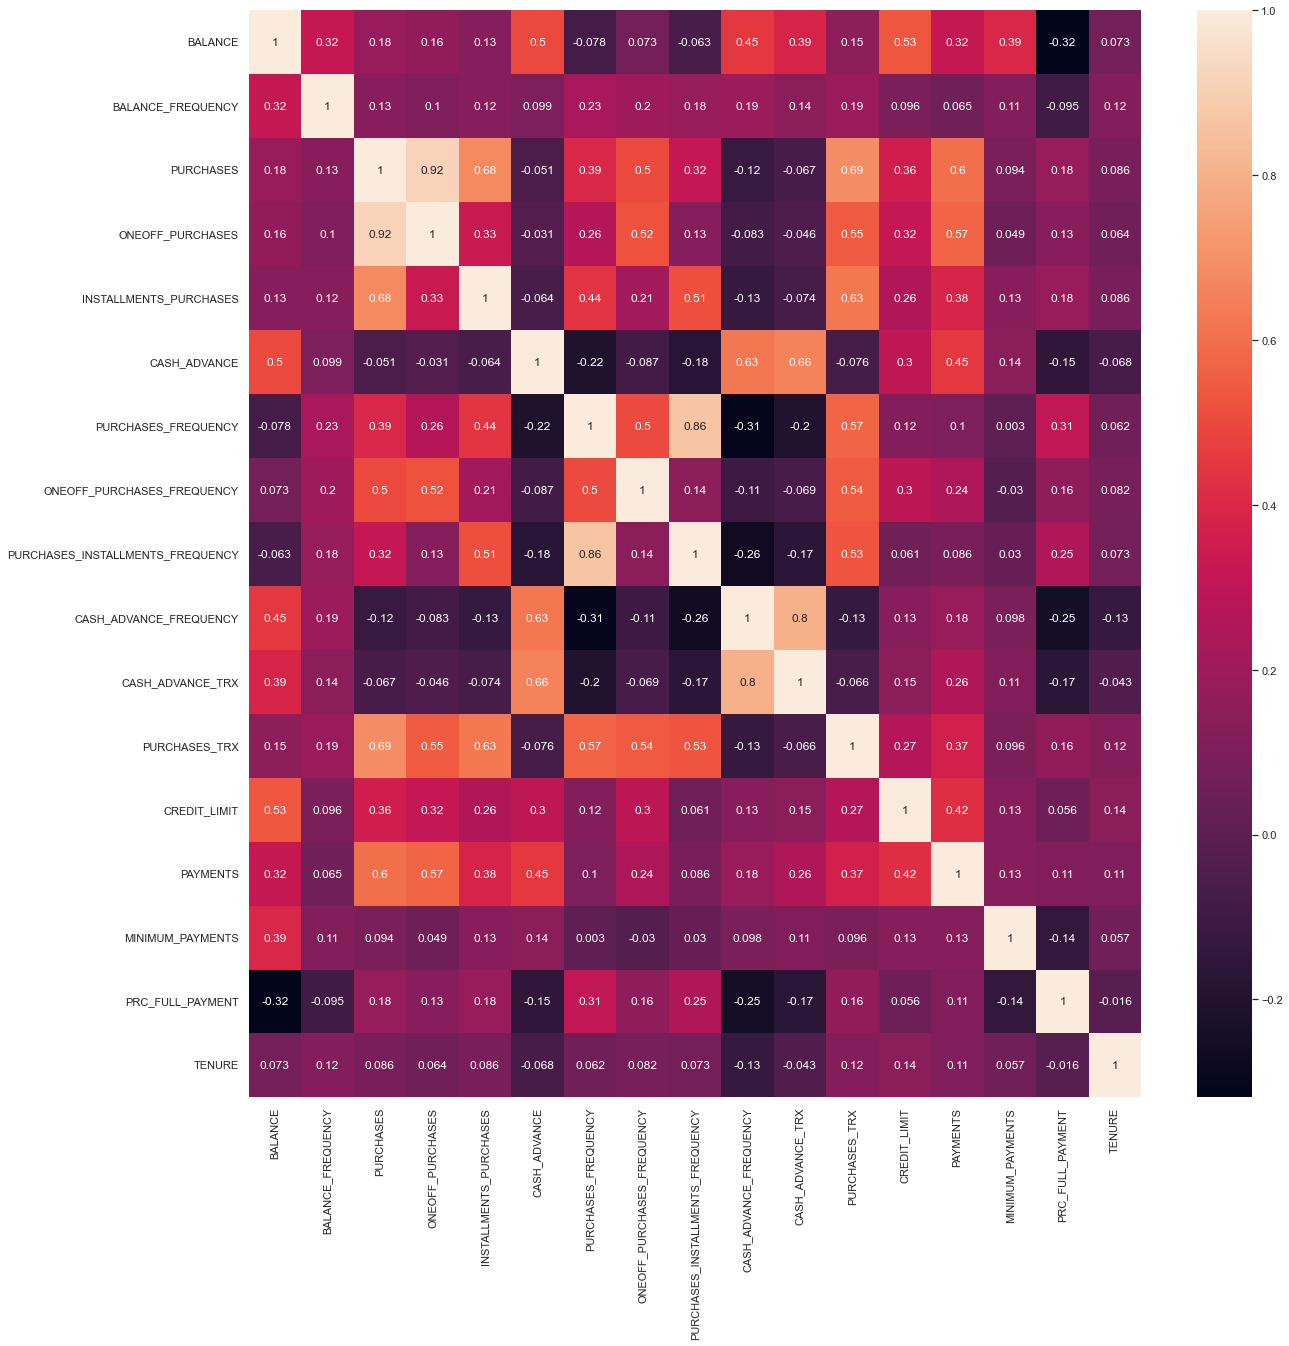

In [28]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True)

**PURCHASES** have high correlation between **ONE-OFF PURCHASES**, **INSTALLMENT PURCHASES**, **PURCHASE TRANCTIONS**, **CREDIT LIMIT**, and **PAYMENTS**

There's a strong positive correlation between **PURCHASES FREQUENCY** and **PURCHASES INSTALLMENT FREQUENCY**

## K-means (Theory and Intuiton)

- K-means is an unsupervised learning algorithm (clustering).
- K-means works by grouping some data points together (clustering) in an unsupervised fashion.
- The algorithm groups observations with similar attribute values together by measuring the Euclidian distance between points.

### How K-means works

- Choose number of clusters 'K'
- Select random K points thar are going to be the centroids for each cluster
- Assign each data point to the nearest centroid, doing so will enable us to create 'K' number of clusters
- Calculate a new centroid for each cluster
- Reassign each data point to the new closest centroid
- Go to step 4 and repeat.

### How to select the optimal number of clusters (K)?
By using the **ELBOW METHOD**

- First calculate the Within Cluster Sum of Squares (WCSS) = **Σ** (*Pi in cluster 1*) distance(Pi,C1)^2 + **Σ** (*Pi in cluster 2*) distance(Pi,C2)^2 + **Σ** (*Pi in cluster 3*) distance(Pi,C3)^2 + **Σ** (*Pi in cluster n*) distance(Pi,Cn)^2

- Then plot the WCSS (*dependent variable / y axis*) againts the number of clusters (*dependent variable / y axis*). 

## Find optimal number of clusters (K)

In [29]:
#scale data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [30]:
df_scaled.shape

(8950, 17)

In [31]:
df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [32]:
score_1 = []
range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_scaled)
    score_1.append(kmeans.inertia_) #inertia is the WCSS

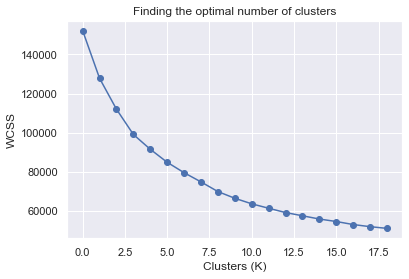

In [33]:
plt.plot(score_1, 'bo-')
plt.title('Finding the optimal number of clusters')
plt.xlabel('Clusters (K)')
plt.ylabel('WCSS')
plt.show()

Will choose either 7 or 8 as number of clusters. 

## Applying K-Means Method

In [34]:
kmeans = KMeans(8)
kmeans.fit(df_scaled)
labels = kmeans.labels_

In [35]:
labels

array([0, 6, 5, ..., 7, 7, 7])

In [36]:
kmeans.cluster_centers_.shape

(8, 17)

In [37]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])

In [38]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.012336,0.404100,-0.357063,-0.241815,-0.399903,-0.095111,-0.852829,-0.394841,-0.754250,0.102656,-0.028901,-0.481554,-0.303115,-0.250717,-0.011770,-0.455671,0.273520
1,1.044635,0.467595,2.475182,1.820048,2.508863,-0.155349,1.162779,1.563685,1.267221,-0.278814,-0.145341,3.113081,1.290382,1.436111,0.555879,0.246267,0.337720
2,-0.701251,-2.141884,-0.310520,-0.235029,-0.302316,-0.322150,-0.555316,-0.442677,-0.440150,-0.521105,-0.376272,-0.419502,-0.175348,-0.202111,-0.256754,0.281920,0.198841
3,-0.361895,0.332243,-0.034749,-0.242428,0.363029,-0.362464,0.993884,-0.384169,1.206422,-0.473142,-0.359917,0.189681,-0.261490,-0.214243,-0.030216,0.314029,0.256155
4,1.819469,0.301643,12.207777,12.296446,6.272587,0.242957,1.002411,2.032081,0.866148,-0.392172,-0.124384,4.369530,3.261192,8.782991,1.003073,1.152351,0.300900
5,-0.136765,0.399921,0.535282,0.664172,0.045282,-0.331562,0.978531,1.903070,0.168494,-0.413992,-0.330318,0.616112,0.428106,0.141135,-0.158759,0.447649,0.268773
6,1.683446,0.392882,-0.221106,-0.159097,-0.230581,2.010094,-0.474634,-0.210303,-0.413898,1.915248,1.921439,-0.269346,1.027564,0.818156,0.551843,-0.390382,0.070181
7,-0.336228,-0.347383,-0.287908,-0.214195,-0.286875,0.067425,-0.201713,-0.285924,-0.224146,0.307084,0.000231,-0.387540,-0.563820,-0.392784,-0.209266,0.014243,-3.202809


In [39]:
#applying inverse transformation to understand what these numbers means
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1590.150773,0.972998,240.334753,191.074491,49.440087,779.418446,0.148069,0.084669,0.064679,0.155687,3.051599,2.740189,3391.593992,1007.342012,836.777761,0.020439,11.883358
1,3738.793623,0.988040,6291.468603,3613.343464,2679.801117,653.097684,0.957030,0.668935,0.868063,0.079351,2.256983,92.089385,9189.385475,5890.543674,2159.658010,0.225744,11.969274
2,104.879787,0.369878,339.774078,202.337758,137.687420,303.307732,0.267475,0.070399,0.189510,0.030866,0.681049,4.282572,3856.463151,1148.051951,265.852622,0.236172,11.783418
3,811.221115,0.955976,928.963824,190.056498,739.350422,218.767056,0.889244,0.087853,0.843900,0.040464,0.792659,19.424603,3543.040775,1112.930019,793.790415,0.245563,11.860119
4,5351.546106,0.948727,27085.309200,21002.018800,6083.290400,1488.363253,0.892667,0.808667,0.708667,0.056667,2.400000,123.320000,16360.000000,27159.043527,3201.825604,0.490758,11.920000
5,1279.810158,0.972008,2146.842193,1694.826560,452.015633,283.570919,0.883082,0.770180,0.431401,0.052300,0.994652,30.024064,6052.074218,2141.716855,494.224337,0.284644,11.877005
6,5068.425814,0.970341,530.808761,328.369220,202.556135,5194.132744,0.299857,0.139720,0.199944,0.518405,16.361239,8.014908,8233.147415,4101.625778,2150.253223,0.039535,11.611239
7,864.645308,0.794979,388.085586,236.917416,151.649711,1120.263874,0.409393,0.117161,0.275356,0.196595,3.250401,5.077047,2443.040850,596.072587,376.521919,0.157880,7.231140


In [40]:
labels.shape

(8950,)

In [41]:
labels.max()

7

In [42]:
labels.min()

0

In [43]:
df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,6
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,7
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,7
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,7
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,7


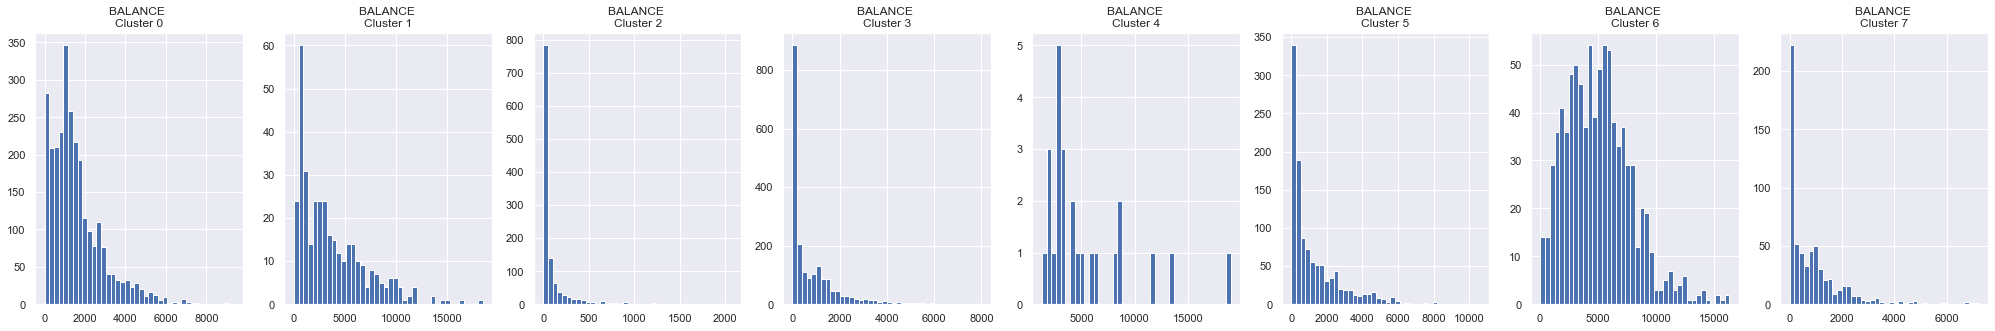

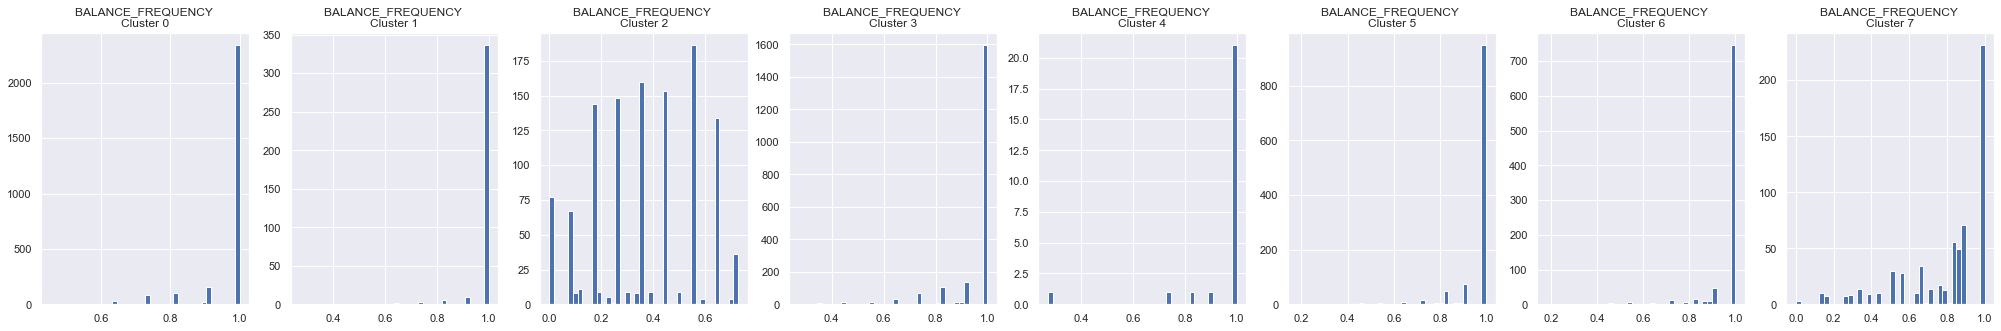

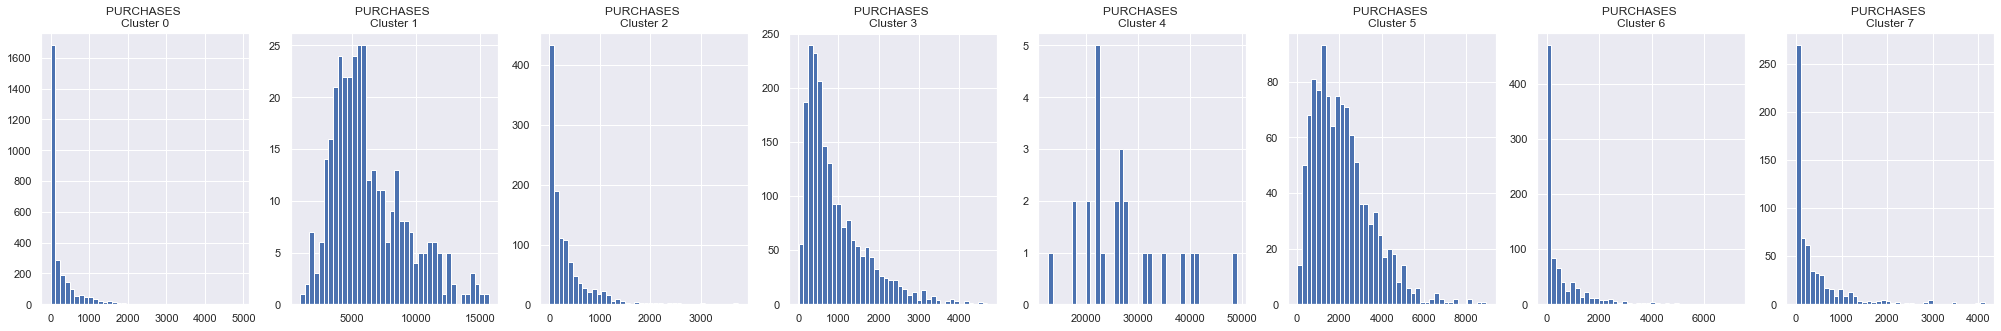

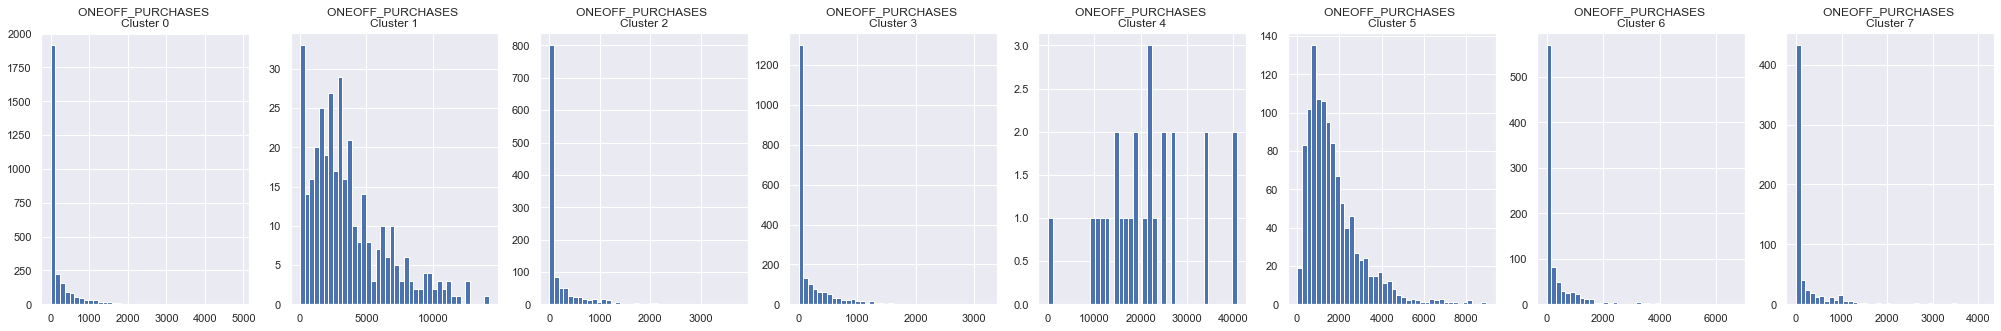

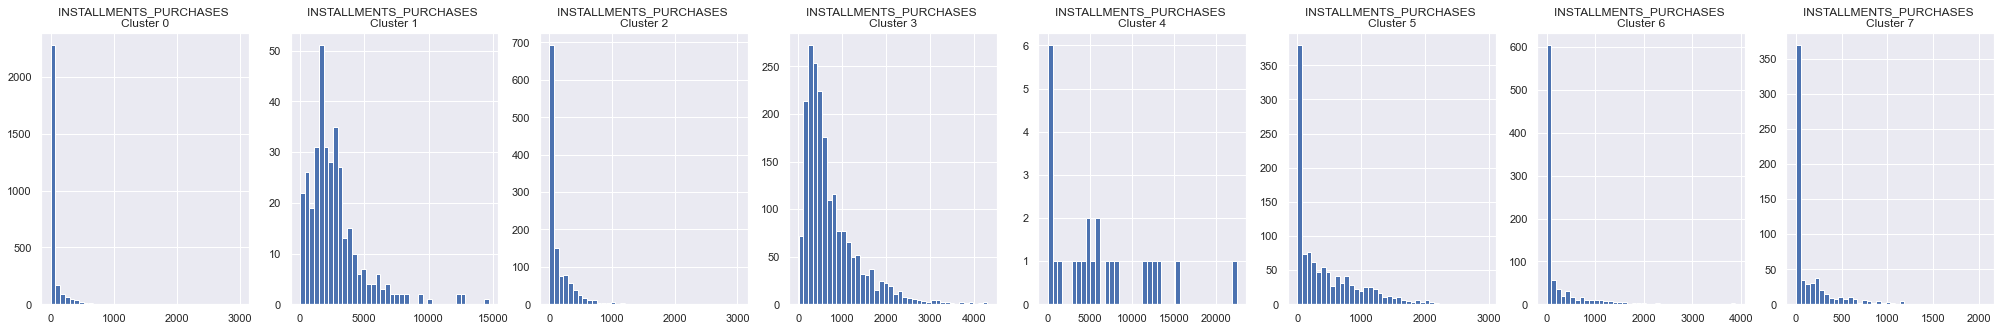

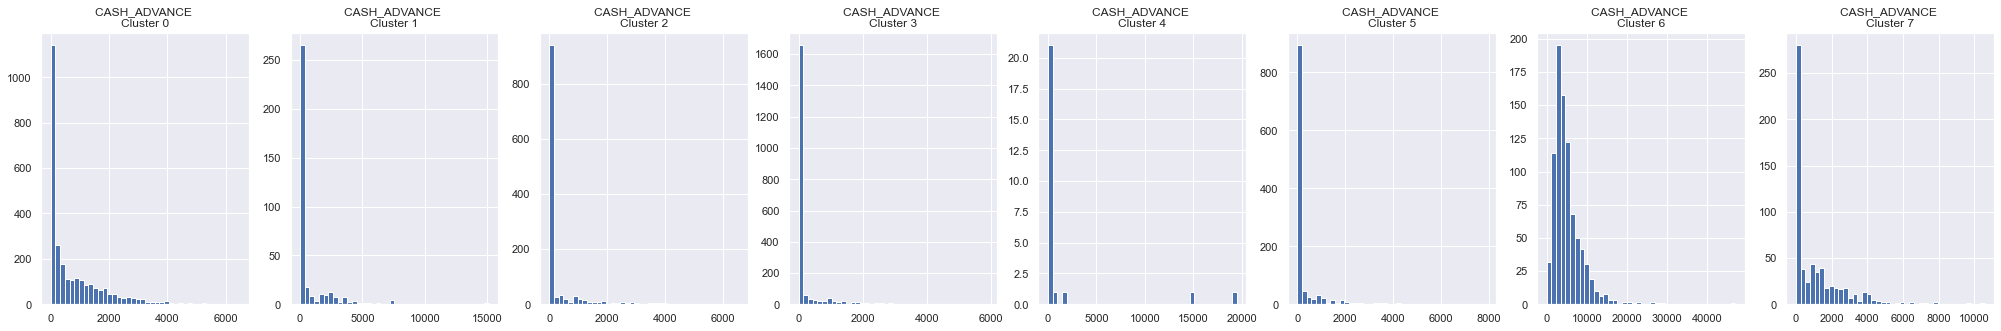

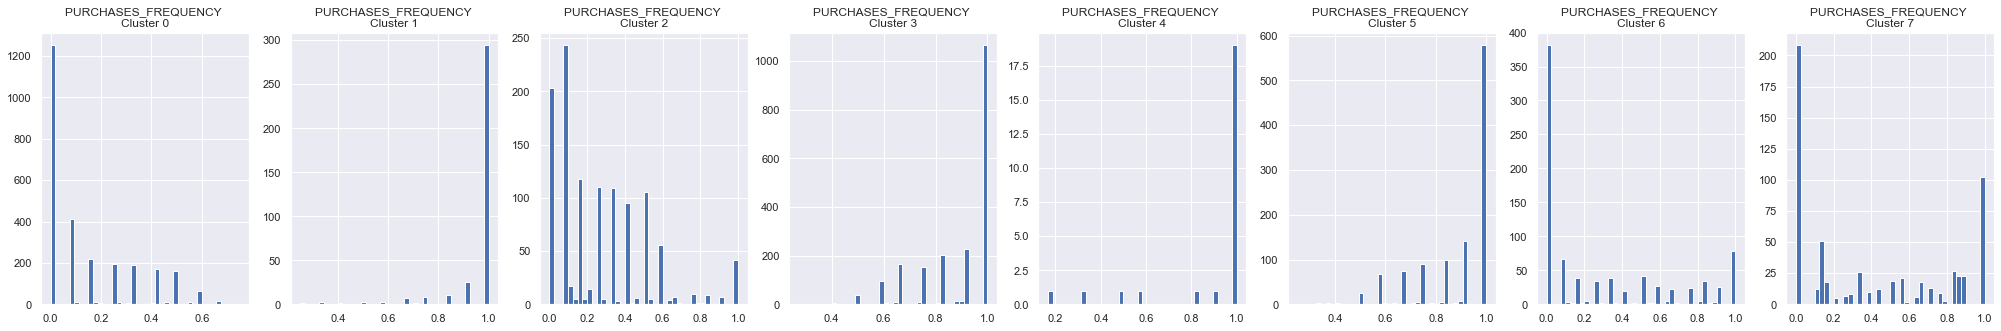

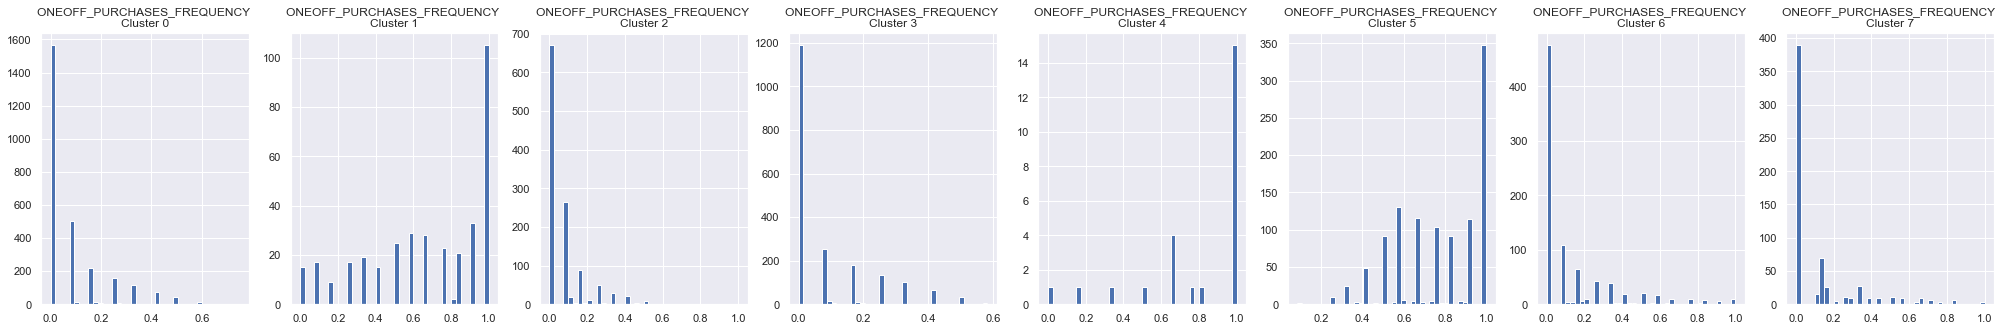

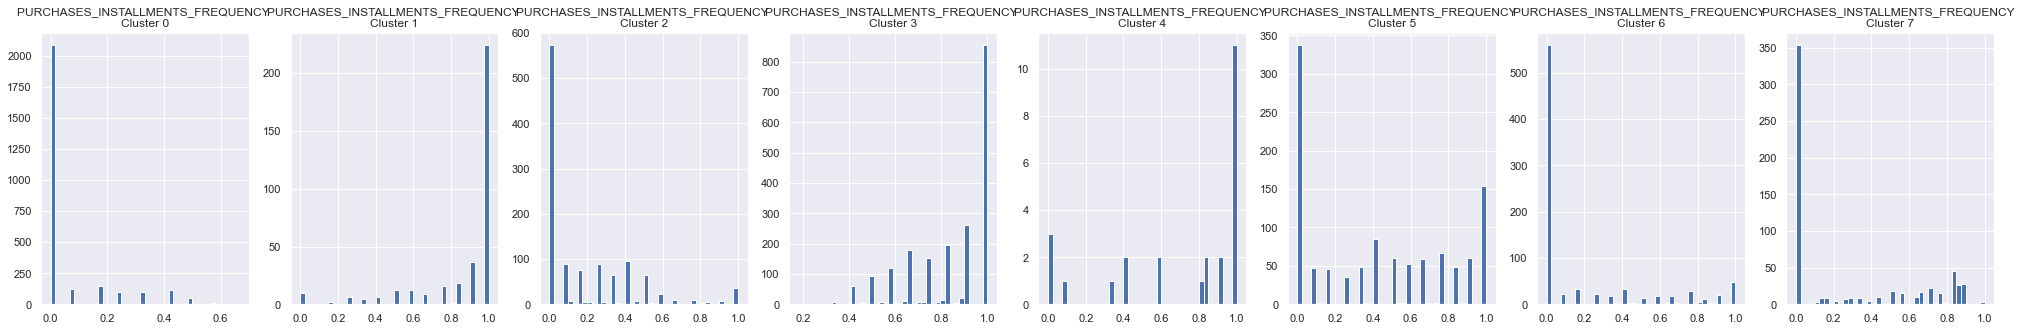

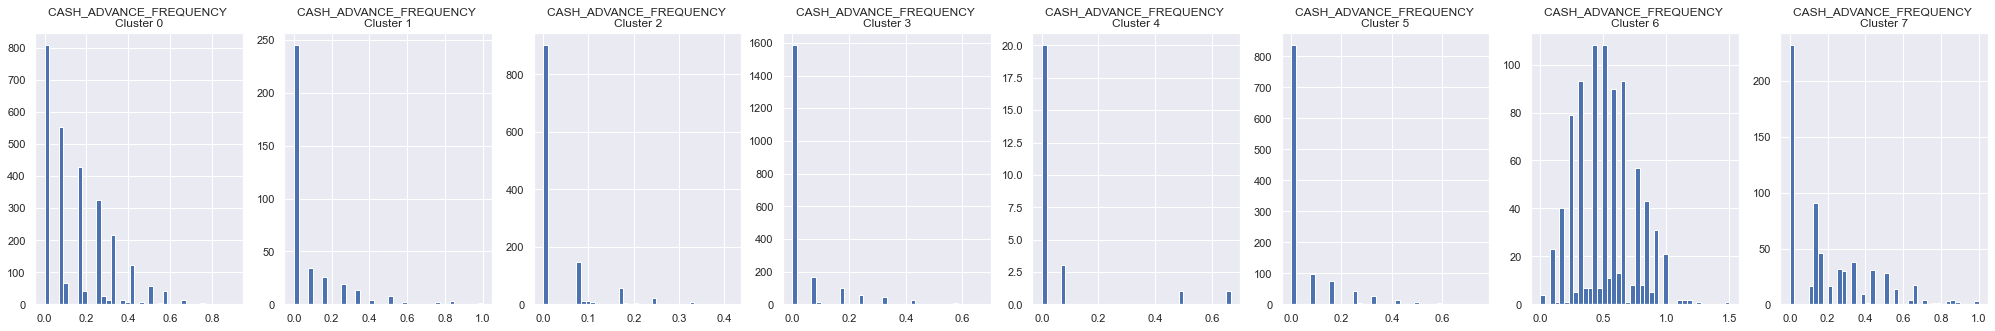

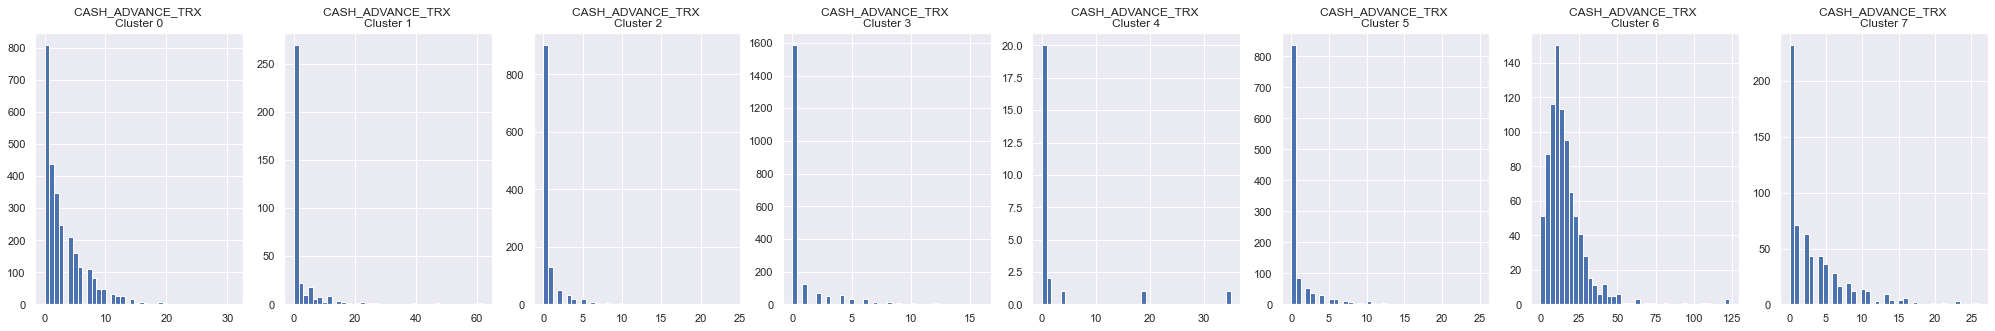

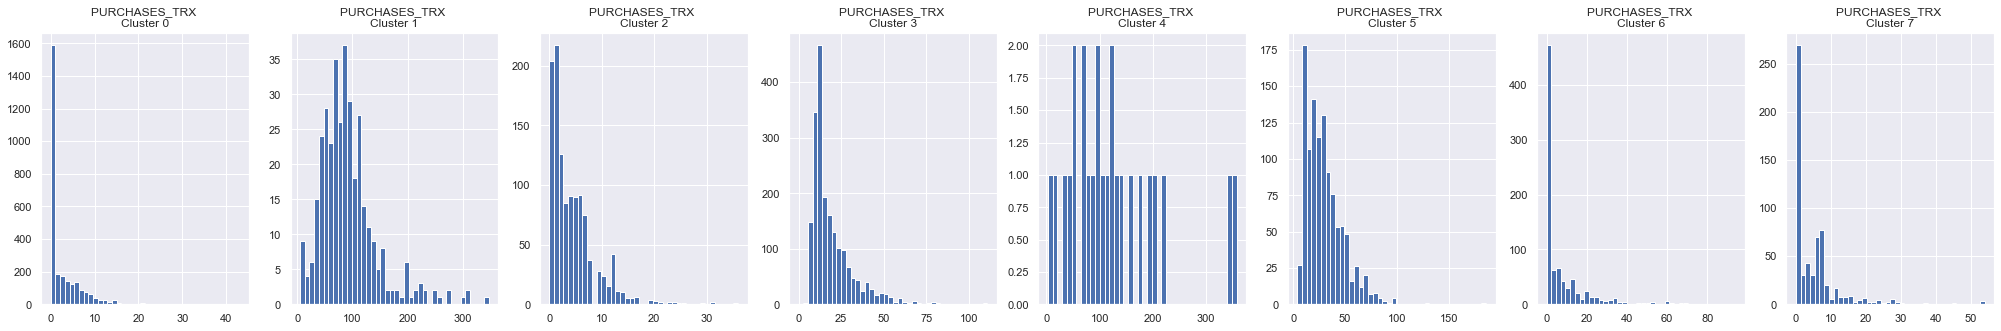

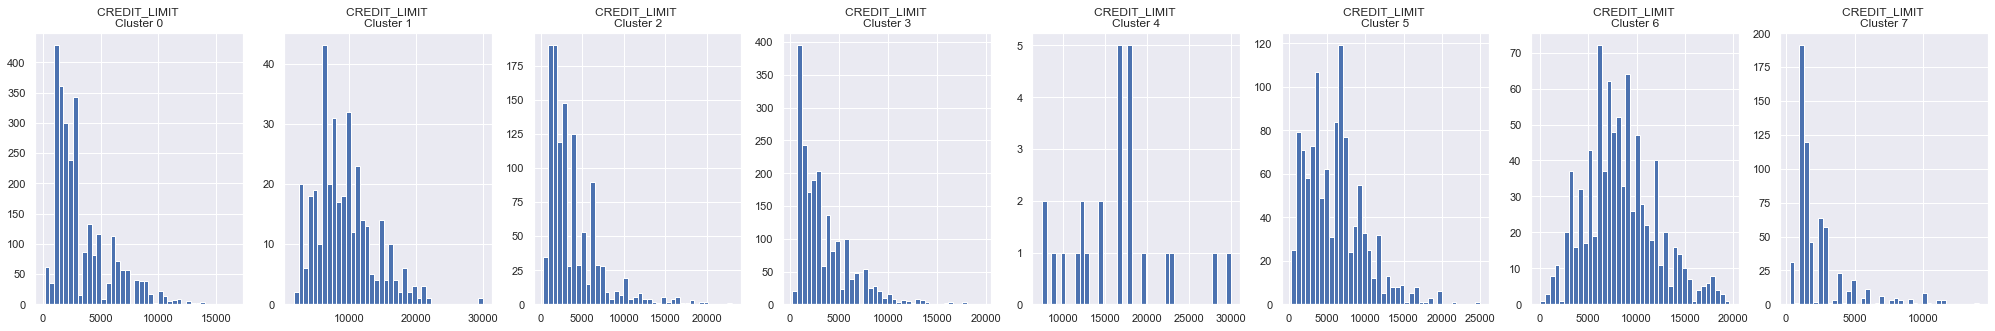

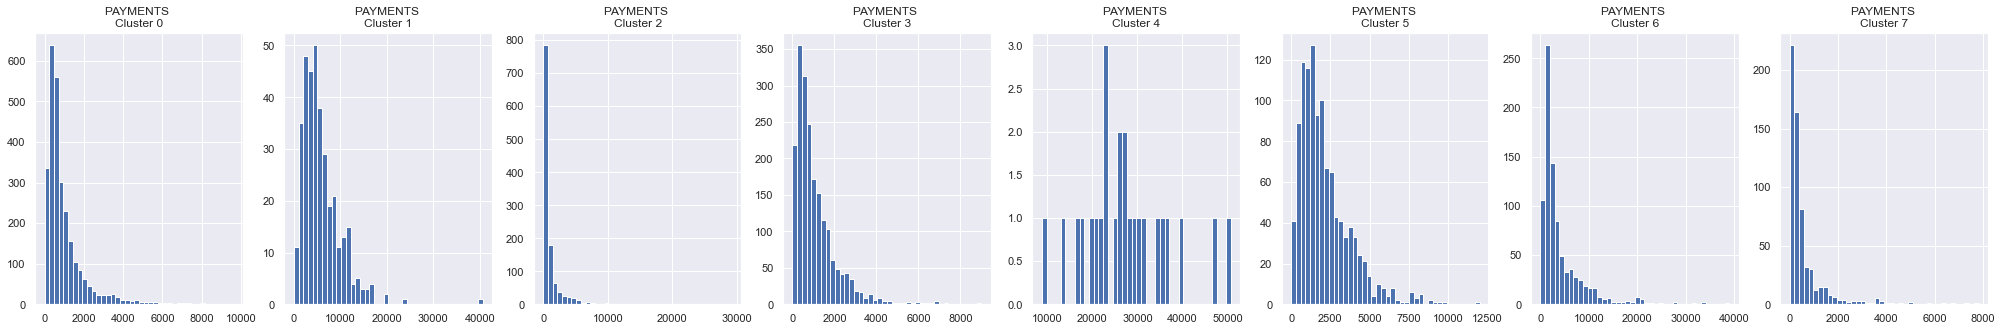

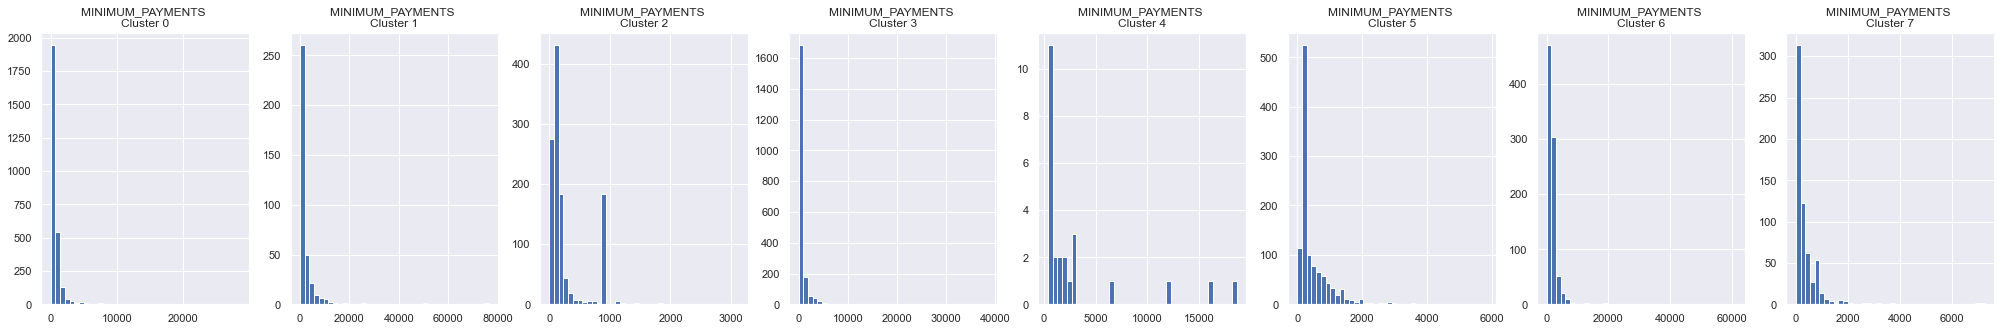

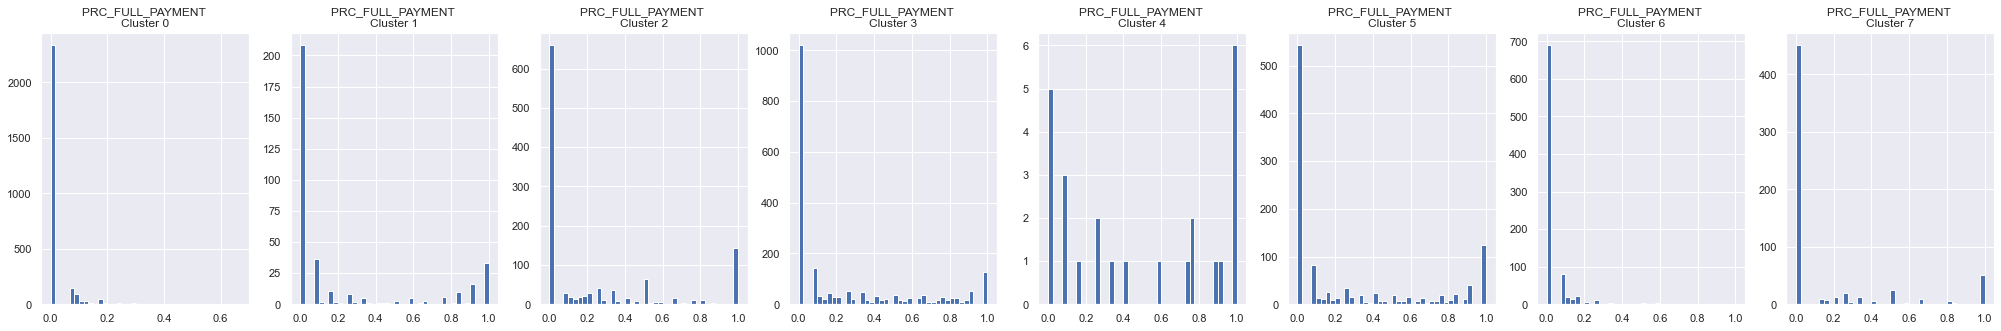

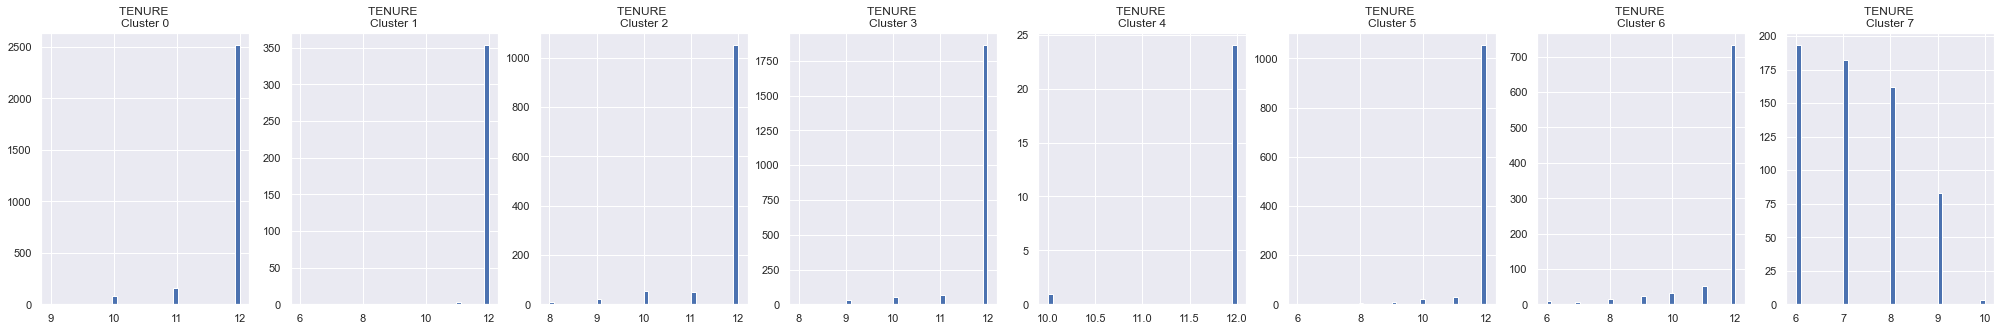

In [44]:
for i in df.columns:
    plt.figure(figsize = (35,5))
    for j in range(8):
        plt.subplot(1,8, j+1)
        cluster = df_cluster[df_cluster['cluster'] == j]
        cluster[i].hist(bins = 40)
        plt.title(f'{i} \nCluster {j}')

## Applying Principal Component Analysis and Visualize the Results

### Principal Component Analysis
- PCA is an unsupervised machine learning algorithm 
- PCA perorms dimensionality reductions while attempting at keeping the original information unchanged
- PCA works by trying to find a new set of features called components
- Components are composites of the uncorrelated given input features

Goal: reduce number of features

In [45]:
#obtain the principal components
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(df_scaled)
principal_comp

array([[-1.6822188 , -1.07645391],
       [-1.13830049,  2.50647422],
       [ 0.96969394, -0.38351922],
       ...,
       [-0.92620064, -1.81078985],
       [-2.33655084, -0.65796657],
       [-0.55642304, -0.40045712]])

In [46]:
#create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682219,-1.076454
1,-1.138300,2.506474
2,0.969694,-0.383519
3,-0.873627,0.043163
4,-1.599432,-0.688584


In [47]:
#concatenate the clusters numbers to the pac dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682219,-1.076454,0
1,-1.138300,2.506474,6
2,0.969694,-0.383519,5
3,-0.873627,0.043163,0
4,-1.599432,-0.688584,0


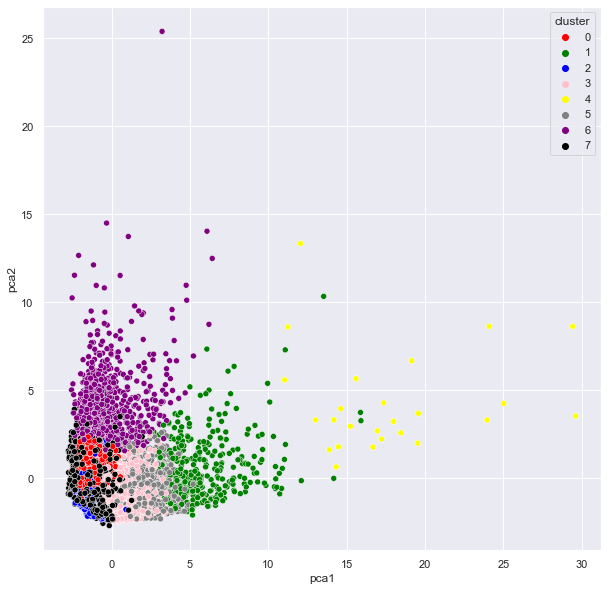

In [48]:
plt.figure(figsize = (10,10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'grey', 'purple', 'black'])

## Autoencoders: Theory and Intuition

- Autoencoders are a type of Artificial Neural Network that are used to perform a task of data encoding (representation learning)
- Autoencoders use the same input data for the input and output
- Autoencoders work well if correlation exits between input data (performs poorly if the all input data is independent)

### Math behing Autoencoders

**Encoder**
- h(x) = sigmoid(W * x + b)
    - w = weight
    - x = input
    - b = bias
    
**Decoder**
- ^x = sigmoid(W* * h(x) + c)
    - w* = weigth
    - h(x) = encoded input
    - c = bias
    
**Tied Weights**
if weights from input to hidden layer are equal to the weights from hidden layer to output
- w* = wt


## Apply Autoencoders (dimensionality reduction)

In [49]:
#import libraries for ANN
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

In [51]:
input_df = Input(shape = (17,))

x = Dense(7, activation='relu')(input_df) #first layer
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x) #hidden layer
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x) #hidden layer
x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(x) #hidden layer

encoded = Dense(10, activation='relu', kernel_initializer='glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(x) #hidden layer
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x) #hidden layer

decoded = Dense(17, kernel_initializer='glorot_uniform')(x)

#Autoencoder
autoencoder = Model(input_df, decoded)

#Encoder
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [52]:
df_scaled.shape

(8950, 17)

In [53]:
autoencoder.fit(df_scaled, df_scaled, batch_size = 128, epochs = 25, verbose = 1)

Epoch 1/25
70/70 [==============================] - 14s 135ms/step - loss: 0.4461
Epoch 2/25
70/70 [==============================] - 9s 133ms/step - loss: 0.2282
Epoch 3/25
70/70 [==============================] - 12s 171ms/step - loss: 0.1850
Epoch 4/25
70/70 [==============================] - 12s 168ms/step - loss: 0.1616
Epoch 5/25
70/70 [==============================] - 11s 163ms/step - loss: 0.1354
Epoch 6/25
70/70 [==============================] - 11s 161ms/step - loss: 0.1240
Epoch 7/25
70/70 [==============================] - 11s 159ms/step - loss: 0.1145
Epoch 8/25
70/70 [==============================] - 11s 158ms/step - loss: 0.0989
Epoch 9/25
70/70 [==============================] - 10s 142ms/step - loss: 0.0896
Epoch 10/25
70/70 [==============================] - 12s 168ms/step - loss: 0.0786
Epoch 11/25
70/70 [==============================] - 11s 153ms/step - loss: 0.0745
Epoch 12/25
70/70 [==============================] - 11s 151ms/step - loss: 0.0666
Epoch 13/25
70

In [54]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense_7 (Dense)             (None, 7)                 126       
                                                                 
 dense_8 (Dense)             (None, 500)               4000      
                                                                 
 dense_9 (Dense)             (None, 500)               250500    
                                                                 
 dense_10 (Dense)            (None, 2000)              1002000   
                                                                 
 dense_12 (Dense)            (None, 2000)              4002000   
                                                                 
 dense_13 (Dense)            (None, 500)               100050

In [55]:
#apply K-Means to the reduce features
pred = encoder.predict(df_scaled)
pred.shape

280/280 [==============================] - 3s 9ms/step


(8950, 10)

In [56]:
pred

array([[0.        , 0.00755471, 0.01837902, ..., 0.        , 0.00253357,
        0.        ],
       [0.        , 0.00247542, 0.01639897, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0289853 , 0.08199912, ..., 0.02656823, 0.        ,
        0.05155506],
       ...,
       [0.09870594, 0.0392743 , 0.06628305, ..., 0.        , 0.04041082,
        0.        ],
       [0.07781121, 0.00416738, 0.03633714, ..., 0.0152063 , 0.04222934,
        0.        ],
       [0.08076098, 0.13319857, 0.18897264, ..., 0.0186785 , 0.0063967 ,
        0.00367025]], dtype=float32)

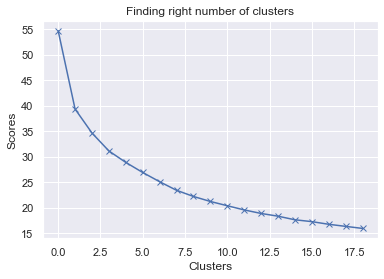

In [59]:
#optimal number of clusters
scores_2 = []

range_values = range(1,20)
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pred)
    scores_2.append(kmeans.inertia_)
    
plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.show()

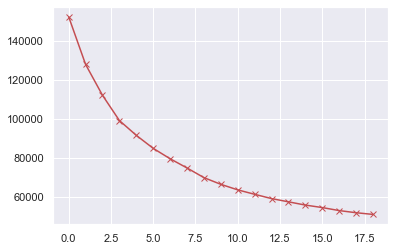

In [65]:
#comparing both scores
plt.plot(score_1, 'bx-', color='r')
plt.show()

In [66]:
#kmeans
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_

In [68]:
df_cluster_dr = pd.concat([df, pd.DataFrame({'Cluster':labels})], axis=1)
df_cluster_dr

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,3
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,3
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,3
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,3


In [70]:
#PCA
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data=prin_comp, columns=['pca1', 'pca2'])

In [71]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-0.023906,0.008917,0
1,-0.026969,0.008958,0
2,0.055068,0.037799,1
3,0.013839,0.001502,0
4,-0.019238,0.005085,0


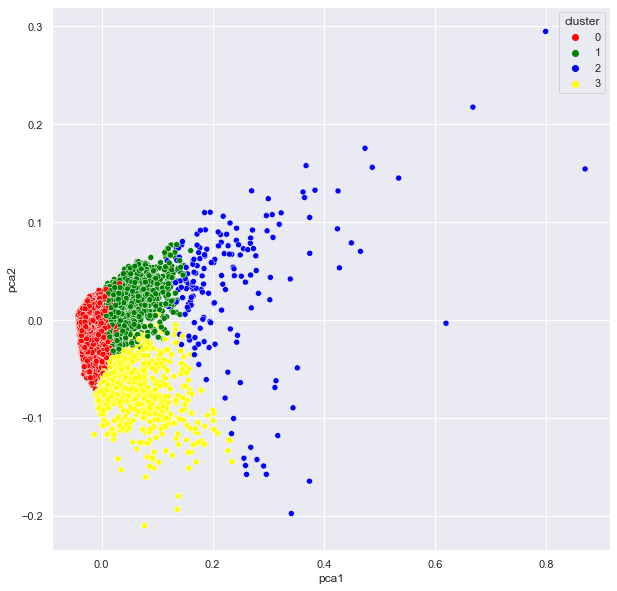

In [72]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = 'pca1', y='pca2', hue='cluster', data=pca_df, palette=['red', 'green', 'blue', 'yellow'])

In [73]:
pca_df

,pca1,pca2,cluster
0,-0.023906,0.008917,0
1,-0.026969,0.008958,0
2,0.055068,0.037799,1
3,0.013839,0.001502,0
4,-0.019238,0.005085,0
...,...,...,...
8945,0.096042,-0.079774,3
8946,0.077494,-0.094695,3
8947,0.059564,-0.091115,3
8948,0.017794,-0.077925,3


In [75]:
final_df = pd.concat([df, pd.DataFrame({'CLUSTER':labels})], axis=1)
final_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,3
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,3
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,3
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,3


In [76]:
cl1 = final_df[final_df['CLUSTER'] == 0]
cl1.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
count,6634.000000,6634.000000,6634.000000,6634.000000,6634.000000,6634.000000,6634.000000,6634.000000,6634.000000,6634.000000,6634.000000,6634.000000,6634.000000,6634.000000,6634.000000,6634.000000,6634.000000,6634.0
mean,1095.712511,0.852824,572.636800,246.900125,326.073384,776.733904,0.429683,0.119292,0.345610,0.110528,2.520048,9.773591,3574.066646,1341.419748,766.990019,0.159860,11.757160,0.0
std,1392.890293,0.258513,870.489046,526.130266,603.261363,1709.231743,0.393785,0.214544,0.394123,0.165420,4.909183,13.553385,2660.933027,2000.874342,2186.166140,0.292453,0.826752,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.0
25%,82.471997,0.818182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1500.000000,344.011316,164.465027,0.000000,12.000000,0.0
50%,606.284656,1.000000,253.535000,0.000000,67.200000,0.000000,0.333333,0.000000,0.166667,0.000000,0.000000,5.000000,3000.000000,703.764448,276.597094,0.000000,12.000000,0.0
75%,1522.451535,1.000000,757.210000,245.010000,413.925000,890.336510,0.833333,0.166667,0.750000,0.166667,3.000000,12.000000,5000.000000,1518.664358,722.536892,0.166667,12.000000,0.0
max,12373.333480,1.000000,10243.480000,6398.730000,7703.260000,27296.485760,1.000000,1.000000,1.000000,1.000000,63.000000,130.000000,21500.000000,34107.074990,61031.618600,1.000000,12.000000,0.0


In [77]:
cl2 = final_df[final_df['CLUSTER'] == 1]
cl2.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
count,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,1493.0
mean,3414.907792,0.972828,1830.246852,1278.036638,552.493470,1528.951012,0.646788,0.449842,0.403404,0.195437,4.754186,24.989283,7802.813128,2585.640822,1207.492033,0.046842,11.843269,1.0
std,2924.077360,0.103388,1950.625529,1496.196138,934.983663,2571.352014,0.371715,0.348890,0.403332,0.242380,7.194855,27.078327,4151.801846,3065.009393,1469.657338,0.144982,0.581970,0.0
min,0.413670,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,0.000000,3.197940,0.000000,8.000000,1.0
25%,1039.408368,1.000000,370.740000,205.000000,0.000000,0.000000,0.333333,0.100000,0.000000,0.000000,0.000000,5.000000,5000.000000,989.999739,361.259813,0.000000,12.000000,1.0
50%,2605.600200,1.000000,1235.390000,849.780000,163.400000,298.390512,0.818182,0.416667,0.333333,0.083333,1.000000,16.000000,7500.000000,1680.748270,853.911515,0.000000,12.000000,1.0
75%,5220.637076,1.000000,2626.060000,1789.700000,749.830000,2238.487012,1.000000,0.750000,0.833333,0.333333,7.000000,35.000000,10500.000000,3100.096212,1565.706094,0.000000,12.000000,1.0
max,16304.889250,1.000000,14454.980000,12650.000000,10009.930000,29282.109150,1.000000,1.000000,1.000000,1.000000,62.000000,199.000000,23000.000000,40627.595240,27631.450720,1.000000,12.000000,1.0


In [78]:
cl3 = final_df[final_df['CLUSTER'] == 2]
cl3.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.0
mean,4923.748336,0.984902,9232.987841,7157.580227,2075.407614,1691.505659,0.946990,0.847898,0.670825,0.216444,6.369318,102.289773,10534.772727,8664.143131,2388.735132,0.204257,11.403409,2.0
std,3941.347024,0.067193,8373.582450,7222.884446,2824.631532,3565.872198,0.127492,0.194678,0.369030,0.305129,10.982842,72.080519,5686.478494,9248.021123,4718.788211,0.345468,1.621918,0.0
min,162.267397,0.272727,529.300000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,3.000000,1120.000000,0.000000,75.319725,0.000000,6.000000,2.0
25%,1999.545658,1.000000,4148.982500,2726.657500,259.732500,0.000000,1.000000,0.750000,0.383333,0.000000,0.000000,51.250000,6500.000000,2344.150617,556.141098,0.000000,12.000000,2.0
50%,3987.241371,1.000000,6778.890000,5001.255000,1056.315000,0.000000,1.000000,0.916667,0.833333,0.000000,0.000000,90.500000,9500.000000,5475.152701,1215.581216,0.000000,12.000000,2.0
75%,6888.792527,1.000000,11191.987500,8671.390000,2645.245000,2068.183455,1.000000,1.000000,1.000000,0.416667,8.500000,131.500000,14125.000000,11429.160365,2382.555909,0.250000,12.000000,2.0
max,19043.138560,1.000000,49039.570000,40761.250000,15497.190000,20712.670080,1.000000,1.000000,1.000000,1.000000,51.000000,358.000000,30000.000000,50721.483360,50260.759470,1.000000,12.000000,2.0


In [79]:
cl4 = final_df[final_df['CLUSTER'] == 3]
cl4.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
count,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.0
mean,1187.103357,0.878148,1270.859845,767.443926,503.462287,1588.276480,0.627200,0.308762,0.384216,0.226296,6.398764,17.778980,4654.164528,1897.075626,654.148039,0.323569,8.336940,3.0
std,1660.610493,0.187035,2381.126762,1391.713492,1590.145029,3253.448210,0.382160,0.362862,0.384222,0.296935,14.907720,31.290198,4262.819942,3709.950784,3755.487420,0.412012,2.308467,0.0
min,0.271854,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,0.000000,7.221665,0.000000,6.000000,3.0
25%,111.232823,0.833333,151.110000,0.000000,0.000000,0.000000,0.261363,0.000000,0.000000,0.000000,0.000000,2.500000,1500.000000,224.367574,113.148918,0.000000,6.000000,3.0
50%,510.504804,1.000000,492.030000,152.000000,94.980000,136.755929,0.800000,0.142857,0.333333,0.125000,1.000000,7.000000,3000.000000,585.954634,194.433112,0.000000,8.000000,3.0
75%,1469.382926,1.000000,1265.255000,913.955000,419.295000,1964.614762,1.000000,0.571429,0.777778,0.375000,6.000000,18.000000,7000.000000,1891.999771,572.073014,0.788889,10.500000,3.0
max,10905.053810,1.000000,27790.420000,14605.990000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,254.000000,23000.000000,39048.597620,76406.207520,1.000000,12.000000,3.0
